In [10]:
import cv2
import pytesseract
import datetime
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import tesserocr
import pandas as pd
import json

In [2]:
cap_path = "Starlink Mission.mp4"

In [3]:
cap = cv2.VideoCapture(cap_path)

In [4]:
def ms(delta):
    return delta.seconds * 1000 + delta.microseconds / 1000

In [5]:
def frame_to_pil_image(frame):
    cv2_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return Image.fromarray(cv2_img)


def get_frame_at_current_position():
    _, frame = cap.read()
    return frame


def get_image_at_current_position():
    frame = get_frame_at_current_position()
    return frame_to_pil_image(frame)


def get_frame_at_position(ts):
    cap.set(cv2.CAP_PROP_POS_MSEC, ms(ts))
    return get_frame_at_current_position()


def get_image_at_position(ts):
    cap.set(cv2.CAP_PROP_POS_MSEC, ms(ts))
    return get_image_at_current_position()

In [6]:
def resize_img(cv2_img, scale):
  width = int(cv2_img.shape[1] * scale)
  height = int(cv2_img.shape[0] * scale)
  dim = (width, height)
  return cv2.resize(cv2_img, dim, interpolation = cv2.INTER_AREA)

In [7]:
launch_ts = datetime.timedelta(minutes=12, seconds=55)
meco_ts = datetime.timedelta(minutes=15, seconds=29)
s2_first_telemetry_ts = datetime.timedelta(minutes=15, seconds=46)


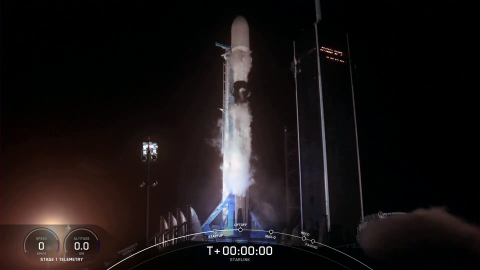

In [8]:
img = get_frame_at_position(launch_ts)
Image.fromarray(resize_img(img, 0.25))

In [9]:
type(img)

numpy.ndarray

In [ ]:
rects = [
  ((118,34),(108,967), "stage1-speed"),
  ((118,34),(265,967), "stage1-altitude"),
  ((118,34),(1529,967), "stage2-speed"),
  ((118,34),(1687,967), "stage2-altitude"),
]
# 1920x1080
rects_relative = [
  (
    (w/1920,h/1080), 
    (x/1920,y/1080), 
    name
  ) for ((w,h), (x,y), name) in rects]

print(rects)
print(rects_relative)

## preview of crop boxes on top of image

In [ ]:
frame = get_frame_at_position(launch_ts)
cv2_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
width = int(cv2_img.shape[1])
height = int(cv2_img.shape[0])

for ((w_rel,h_rel), (x_rel,y_rel), name) in rects_relative:
  x = int(x_rel * width)
  y = int(y_rel * height)
  w = int(w_rel * width)
  h = int(h_rel * height)
  cv2_img2 = cv2.rectangle(cv2_img, (x, y), (x+w, y+h), (255,0,0))


print('Original Dimensions : ', cv2_img2.shape)
resized = resize_img(cv2_img2, 0.5)
print('Resized Dimensions : ', resized.shape)

Image.fromarray(resized)

```javascript

{
"field_1": [
        [top, bottom, left, right],
        
        ["path_to_template_1.png", "path_to_template_2.png", ...],
        
        threshold,
        
        [expected_length_1, expected_length_2, ...]
    ]
}
```

In [13]:
with open('spaceXtract_spacex_config.json') as f:
  cfg = json.load(f)

cfg['anchor']

[None, ['./Templates/dm-1/1080p/anchor.png'], 0.7, []]

In [34]:
def relative_to_abs(anchor_location, points):
    return [
        anchor_location[0] + points[0],
        anchor_location[0] + points[1],
        anchor_location[2] + points[2],
        anchor_location[2] + points[3],
    ]

In [14]:
anchor_location = [0.9111111111111111, 0.9444444444444444, 0.4296875, 0.459375]

In [63]:
def draw_rect(cv2_img, relative_locations):
  width = int(cv2_img.shape[1])
  height = int(cv2_img.shape[0])

  [y1_rel, y2_rel, x1_rel, x2_rel] = relative_locations
  x1 = int(x1_rel * width)
  x2 = int(x2_rel * width)
  y1 = int(y1_rel * height)
  y2 = int(y2_rel * height)
  return cv2.rectangle(cv2_img, (x1, y1), (x2, y2), (255,0,0), 3)

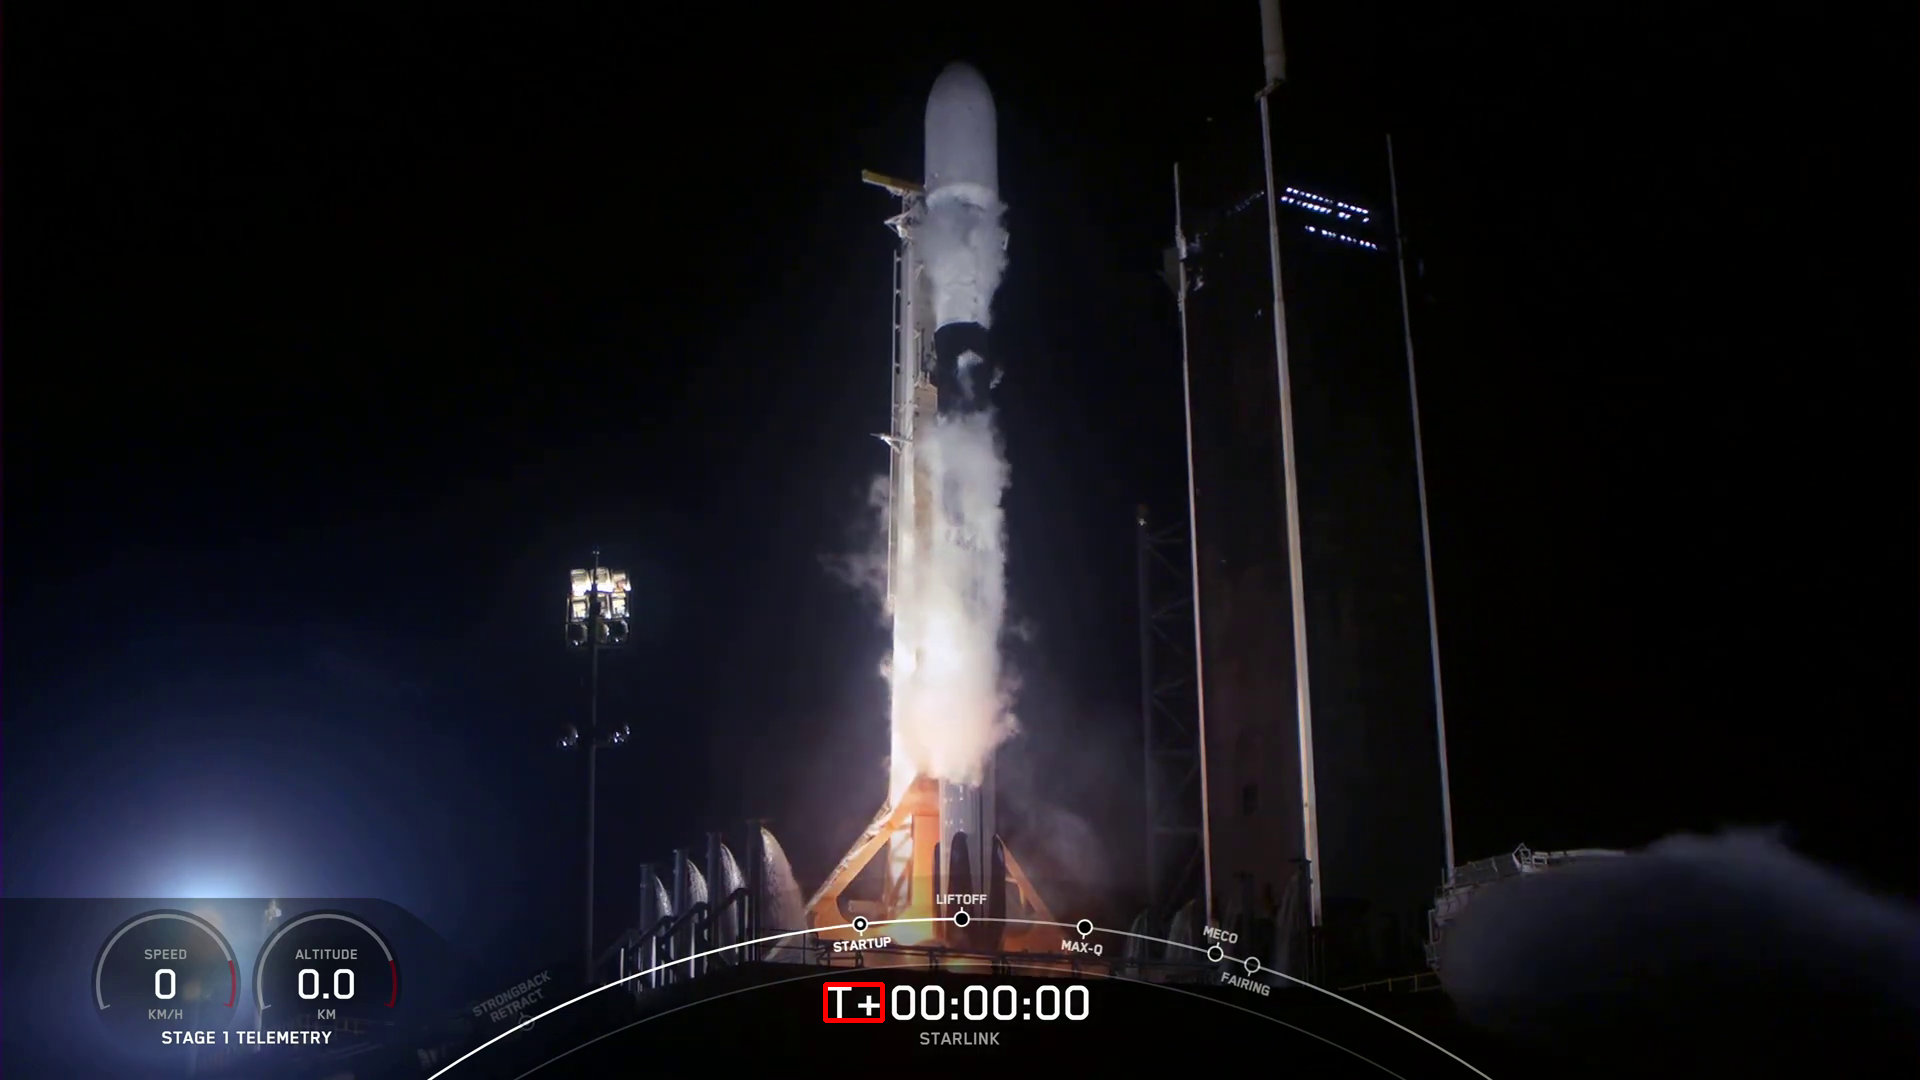

In [64]:
frame = get_frame_at_position(launch_ts)
cv2_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cv2_img2 = draw_rect(cv2_img, anchor_location)
Image.fromarray(cv2_img2)

In [48]:
relative_cfg = dict([kv for kv in cfg.items() if kv[1][0]])
relative_cfg.keys()

dict_keys(['stage', 'unit', 'sign', 'velocity', 'altitude', 'time'])

## draw rects

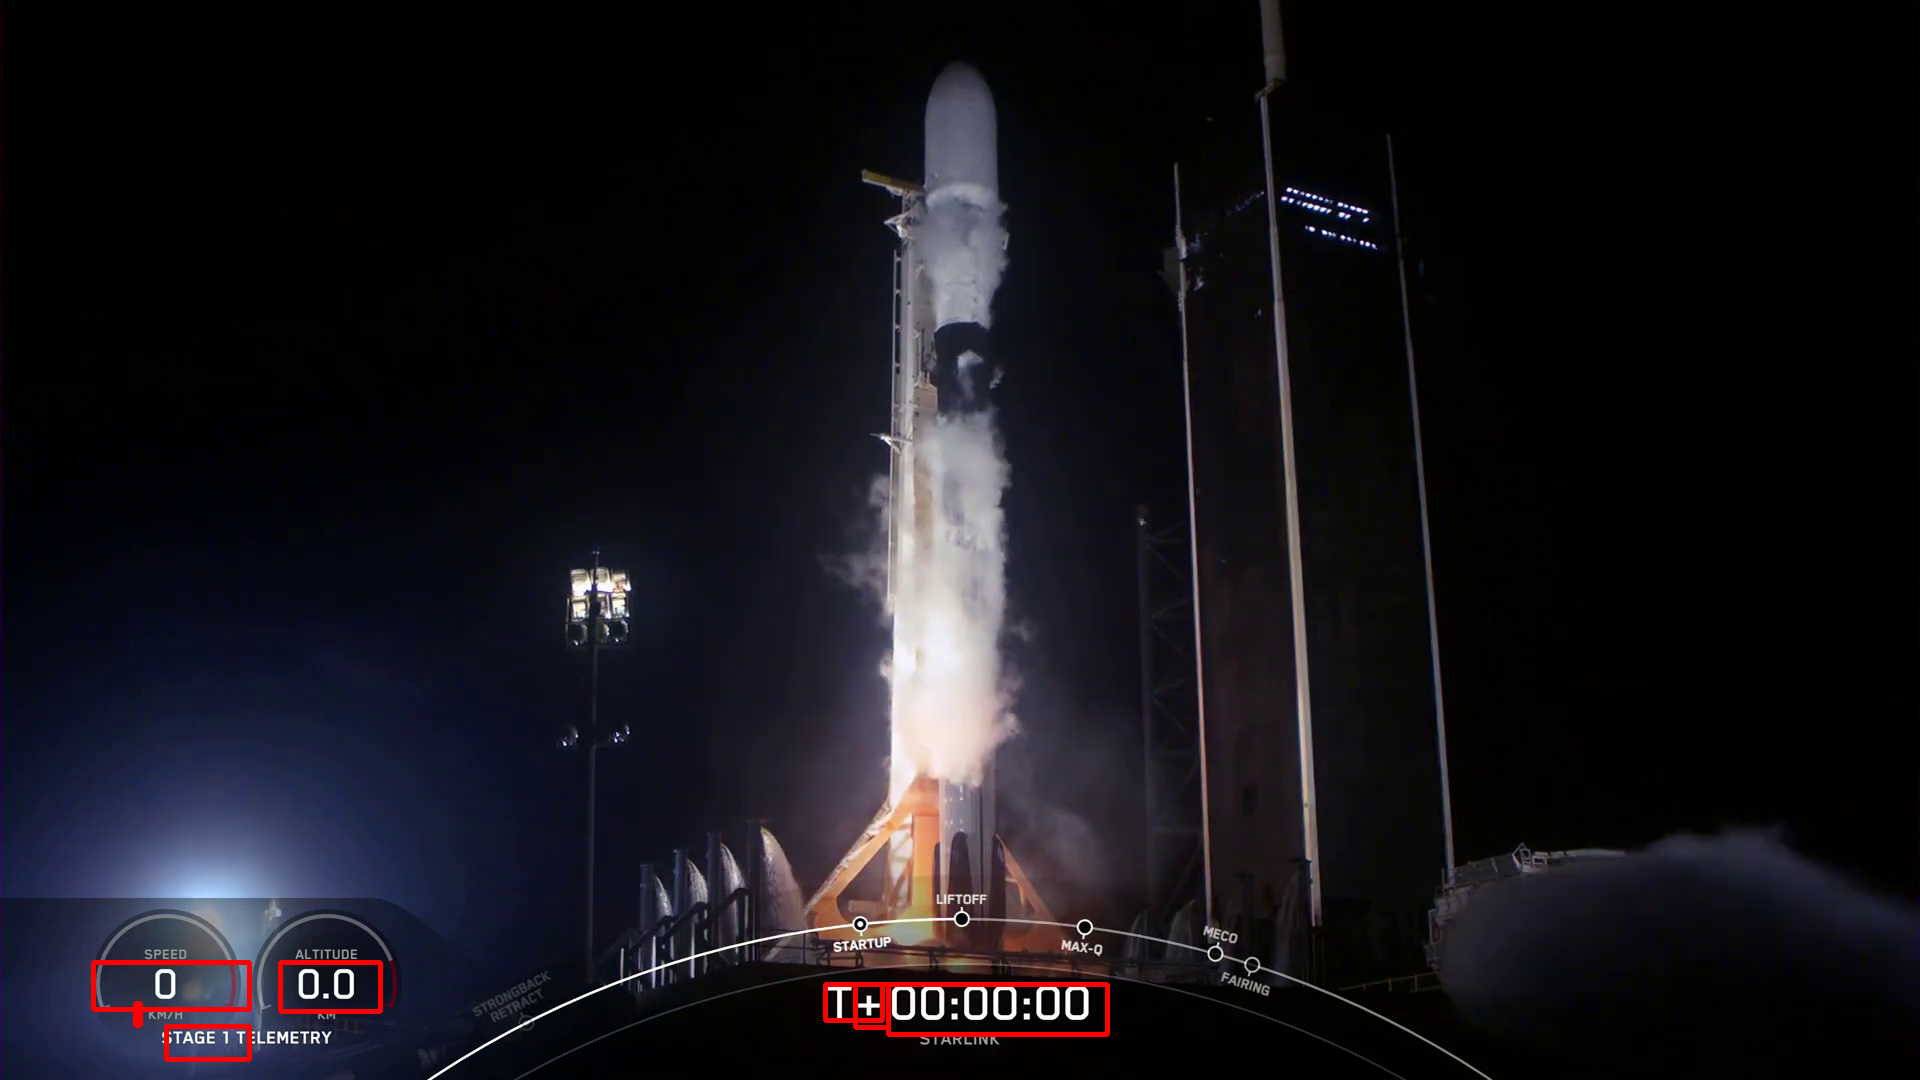

In [65]:
img = cv2_img
for _, values in relative_cfg.items():
  relative_to_anchor_location = values[0]
  relative_location = relative_to_abs(anchor_location, relative_to_anchor_location)
  img = draw_rect(img, relative_location)

Image.fromarray(img)

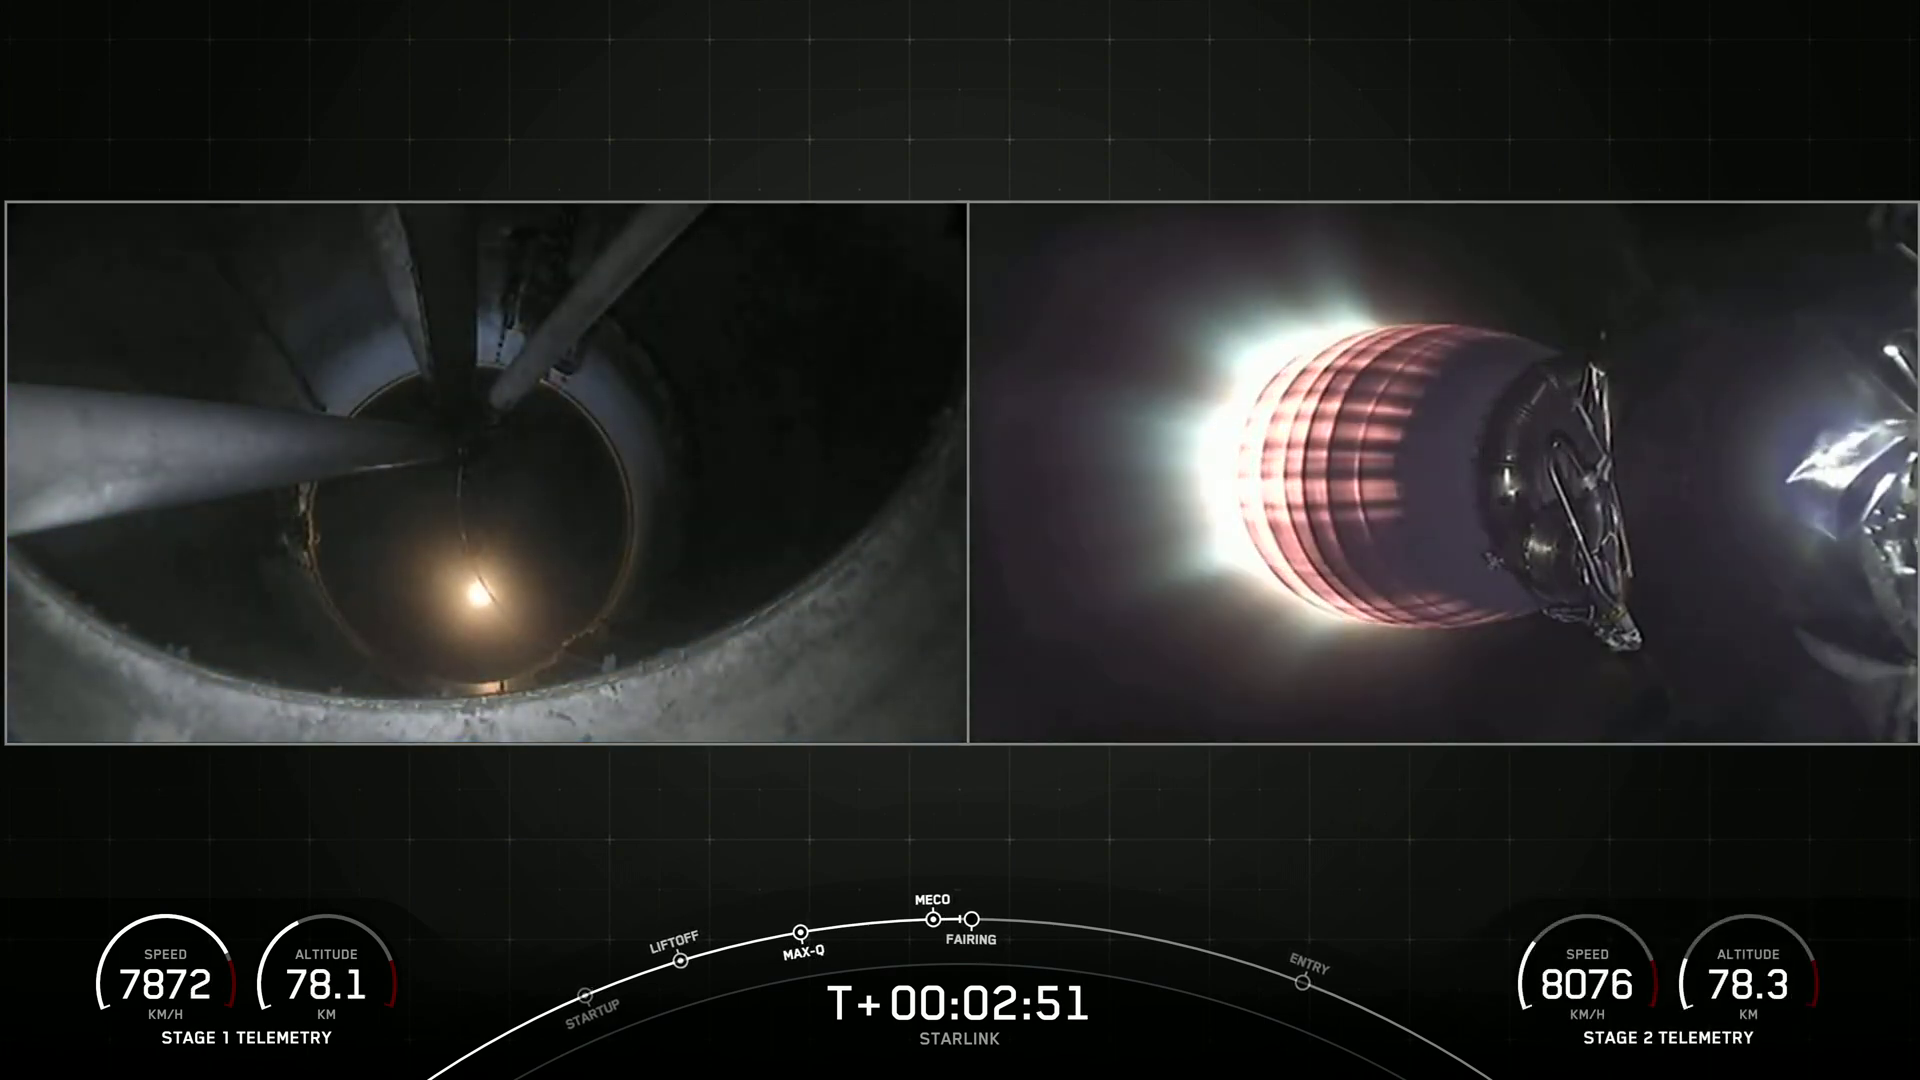

In [66]:
frame = get_frame_at_position(s2_first_telemetry_ts)
cv2_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
Image.fromarray(cv2_img)